In [1]:
# Install gdown if you haven't already
!pip install gdown

# Import gdown
import gdown

# Define the file ID (from your link)
file_id = '1ZDJfH_XP7aPDsojGQiGIseu1AmVZfzdQ'

# Download the file from Google Drive
gdown.download(f'https://drive.google.com/uc?id={file_id}', 'your_downloaded_file.tar', quiet=False)

# Extract the .tar file
import tarfile

# Open and extract the .tar file
with tarfile.open('your_downloaded_file.tar', 'r') as tar:
    tar.extractall()  # This will extract the contents to the current directory

# Optionally, list the extracted files
import os

# List the contents of the extracted folder
extracted_files = os.listdir('.')
print(extracted_files)




Downloading...
From (original): https://drive.google.com/uc?id=1ZDJfH_XP7aPDsojGQiGIseu1AmVZfzdQ
From (redirected): https://drive.google.com/uc?id=1ZDJfH_XP7aPDsojGQiGIseu1AmVZfzdQ&confirm=t&uuid=6f041f92-dee2-4d21-a4b2-571ee66b82f8
To: /kaggle/working/your_downloaded_file.tar
100%|██████████| 7.61G/7.61G [01:22<00:00, 92.4MB/s]


['Task01_BrainTumour', '__notebook__.ipynb', 'your_downloaded_file.tar']


Epoch 1/100


I0000 00:00:1732131834.647137      72 service.cc:145] XLA service 0x7cc31c0030a0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732131834.647202      72 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1732131834.647211      72 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1732131858.798459      72 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_add_reduce_fusion_9', 420 bytes spill stores, 444 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_7', 304 bytes spill stores, 304 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_add_reduce_fusion_17', 272 bytes spill stores, 272 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_120', 88 bytes spill stores, 88 b

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.7837 - loss: 0.9234 - mean_io_u: 0.3735

/opt/conda/lib/python3.10/site-packages/keras/src/saving/serialization_lib.py:390: UserWarning: The object being serialized includes a `lambda`. This is unsafe. In order to reload the object, you will have to pass `safe_mode=False` to the loading function. Please avoid using `lambda` in the future, and use named Python functions instead. This is the `lambda` being serialized:     loss=lambda y_true, y_pred: dice_loss(y_true, y_pred) + tf.keras.losses.categorical_crossentropy(y_true, y_pred),

  return {key: serialize_keras_object(value) for key, value in obj.items()}


14/14 ━━━━━━━━━━━━━━━━━━━━ 132s 8s/step - accuracy: 0.7919 - loss: 0.8937 - mean_io_u: 0.3727 - val_accuracy: 0.9655 - val_loss: 0.6490 - val_mean_io_u: 0.3750 - learning_rate: 0.0010
Epoch 2/100


I0000 00:00:1732131980.159705      73 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_add_reduce_fusion_9', 420 bytes spill stores, 444 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_7', 304 bytes spill stores, 304 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_add_reduce_fusion_17', 272 bytes spill stores, 272 bytes spill loads
ptxas warning : Registers are spilled to local memory in function 'input_reduce_fusion_120', 88 bytes spill stores, 88 bytes spill loads



14/14 ━━━━━━━━━━━━━━━━━━━━ 98s 6s/step - accuracy: 0.9710 - loss: 0.1371 - mean_io_u: 0.3729 - val_accuracy: 0.9764 - val_loss: 0.2190 - val_mean_io_u: 0.3750 - learning_rate: 0.0010
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 86s 7s/step - accuracy: 0.9738 - loss: 0.1083 - mean_io_u: 0.3729 - val_accuracy: 0.9630 - val_loss: 0.2638 - val_mean_io_u: 0.3750 - learning_rate: 0.0010
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 90s 6s/step - accuracy: 0.9718 - loss: 0.1219 - mean_io_u: 0.3729 - val_accuracy: 0.9697 - val_loss: 0.2267 - val_mean_io_u: 0.3750 - learning_rate: 0.0010
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 90s 6s/step - accuracy: 0.9758 - loss: 0.1094 - mean_io_u: 0.3729 - val_accuracy: 0.9698 - val_loss: 0.2338 - val_mean_io_u: 0.3750 - learning_rate: 0.0010
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 90s 6s/step - accuracy: 0.9739 - loss: 0.1089 - mean_io_u: 0.3729 - val_accuracy: 0.9643 - val_loss: 0.2865 - val_mean_io_u: 0.3750 - learning_rate: 0.0010
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━

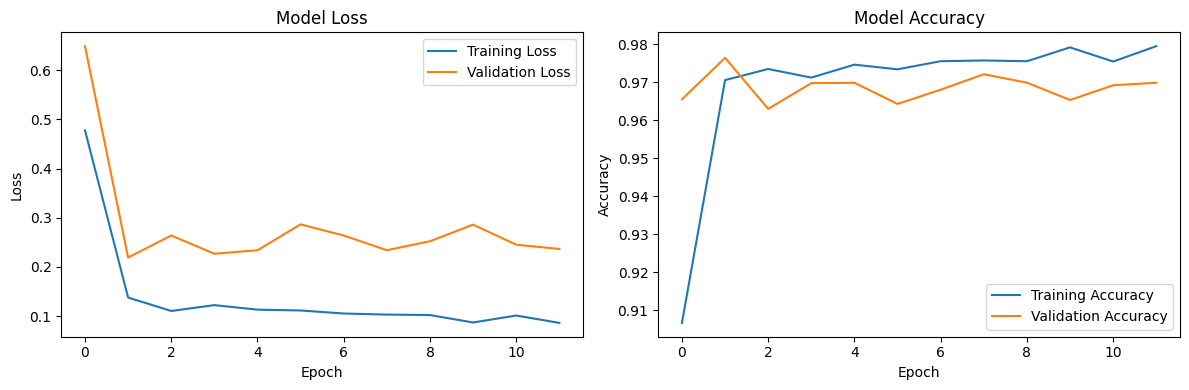

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import nibabel as nib
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def attention_block(x, filters):
    """
    Attention mechanism to help the model focus on relevant features
    """
    # Generate attention weights
    attention = layers.Conv2D(filters, 1, padding='same')(x)
    attention = layers.BatchNormalization()(attention)
    attention = layers.Activation('relu')(attention)
    attention = layers.Conv2D(filters, 1, padding='same')(attention)
    attention = layers.BatchNormalization()(attention)
    attention = layers.Activation('sigmoid')(attention)
    
    # Apply attention weights to input
    return layers.Multiply()([x, attention])

def get_cnn_attention_model(input_shape=(240, 240, 4), num_classes=4):
    inputs = layers.Input(input_shape)
    
    # First Conv Block with attention
    x = layers.Conv2D(64, 3, padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.Conv2D(64, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = attention_block(x, 64)
    x = layers.MaxPooling2D(2)(x)
    
    # Second Conv Block with attention
    x = layers.Conv2D(128, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.Conv2D(128, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = attention_block(x, 128)
    x = layers.MaxPooling2D(2)(x)
    
    # Third Conv Block with attention
    x = layers.Conv2D(256, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.Conv2D(256, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = attention_block(x, 256)
    x = layers.MaxPooling2D(2)(x)
    
    # Fourth Conv Block with attention
    x = layers.Conv2D(512, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.Conv2D(512, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = attention_block(x, 512)
    
    # Upsampling path
    x = layers.UpSampling2D(size=(8, 8))(x)  # Upsample to original size
    
    # Final convolution
    x = layers.Conv2D(num_classes, 1, activation='softmax')(x)
    
    model = models.Model(inputs=inputs, outputs=x)
    return model

def load_and_preprocess_image(image_path, mask_path):
    img = nib.load(image_path).get_fdata()
    mask = nib.load(mask_path).get_fdata()
    
    # Select the middle slice along the depth dimension
    img_2d = img[:, :, img.shape[2] // 2, :]  
    mask_2d = mask[:, :, mask.shape[2] // 2]  
    
    # Normalize each channel of the image
    for i in range(img_2d.shape[-1]):
        channel = img_2d[:, :, i]
        img_2d[:, :, i] = (channel - np.min(channel)) / (np.max(channel) - np.min(channel))
    
    # Convert mask to one-hot encoding
    mask_onehot = tf.keras.utils.to_categorical(mask_2d, num_classes=4)
    
    return img_2d, mask_onehot

def data_generator(image_filenames, mask_filenames, batch_size):
    num_samples = len(image_filenames)
    while True:
        indices = np.random.permutation(num_samples)
        for start in range(0, num_samples, batch_size):
            end = min(start + batch_size, num_samples)
            batch_indices = indices[start:end]
            batch_images = []
            batch_masks = []
            for idx in batch_indices:
                try:
                    img, mask = load_and_preprocess_image(image_filenames[idx], mask_filenames[idx])
                    batch_images.append(img)
                    batch_masks.append(mask)
                except FileNotFoundError:
                    print(f"File not found: {image_filenames[idx]} or {mask_filenames[idx]}")
            yield np.array(batch_images), np.array(batch_masks)

# File paths setup
image_filenames = [f'/kaggle/working/Task01_BrainTumour/imagesTr/BRATS_{str(i).zfill(3)}.nii.gz' for i in range(1, 150)]
mask_filenames = [f'/kaggle/working/Task01_BrainTumour/labelsTr/BRATS_{str(i).zfill(3)}.nii.gz' for i in range(1, 150)]

# Split into train and test sets
train_image_filenames, test_image_filenames, train_mask_filenames, test_mask_filenames = train_test_split(
    image_filenames, mask_filenames, test_size=0.2, random_state=42
)

# Create the model
model = get_cnn_attention_model()

# Define custom Dice loss
def dice_loss(y_true, y_pred):
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)
    return 1 - numerator / denominator

# Compile the model
model.compile(
    optimizer='adam',
    loss=lambda y_true, y_pred: dice_loss(y_true, y_pred) + tf.keras.losses.categorical_crossentropy(y_true, y_pred),
    metrics=['accuracy', tf.keras.metrics.MeanIoU(num_classes=4)]
)

# Set up callbacks
callbacks = [
    tf.keras.callbacks.ModelCheckpoint('best_model_cnn_attention.keras', save_best_only=True, monitor='val_loss'),
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-6),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
]

# Training parameters
batch_size = 8
epochs = 100

# Train the model
history = model.fit(
    data_generator(train_image_filenames, train_mask_filenames, batch_size),
    steps_per_epoch=len(train_image_filenames) // batch_size,
    epochs=epochs,
    validation_data=data_generator(test_image_filenames, test_mask_filenames, batch_size),
    validation_steps=len(test_image_filenames) // batch_size,
    callbacks=callbacks
)

# Save the final model
model.save('brain_tumor_segmentation_cnn_attention.keras')

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


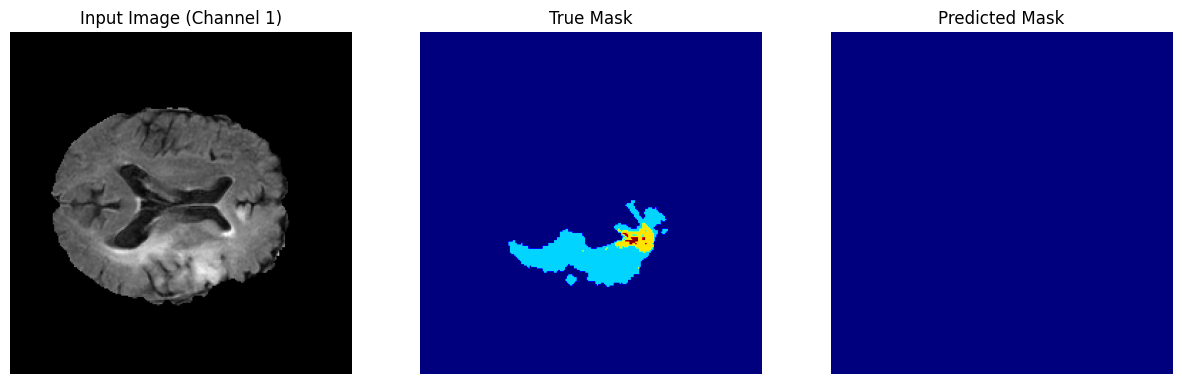

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


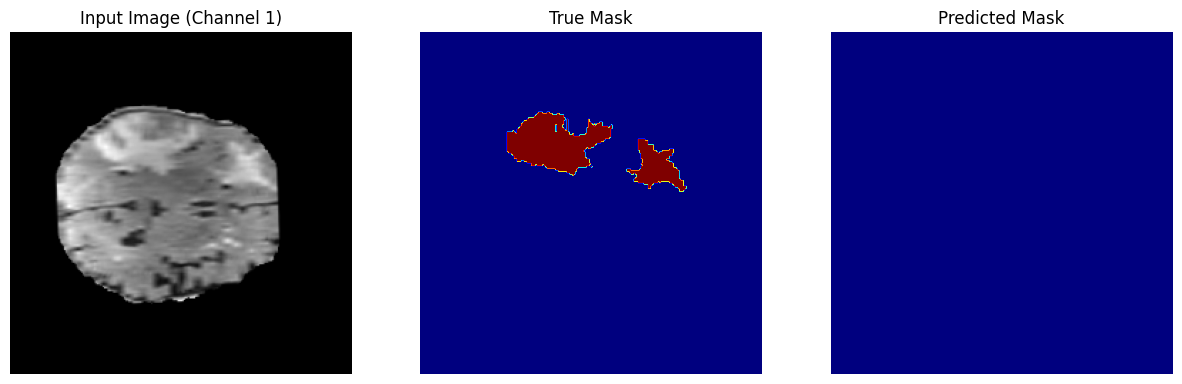

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


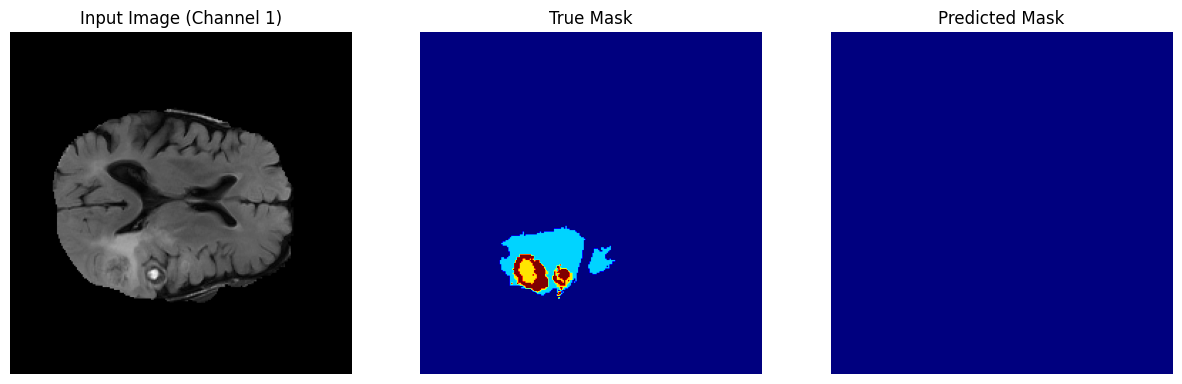

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


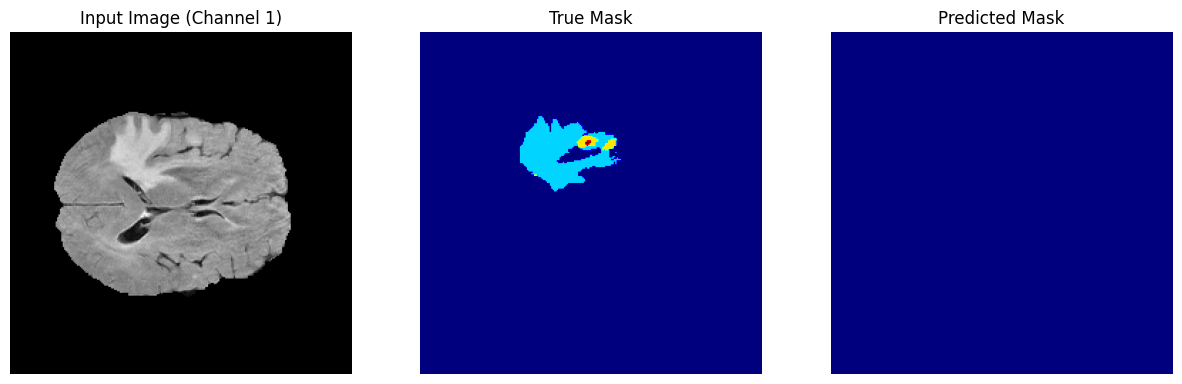

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


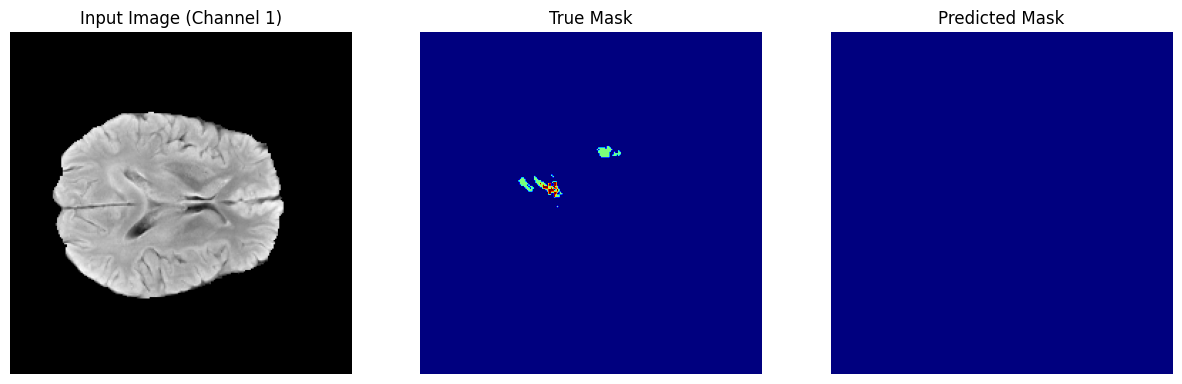

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


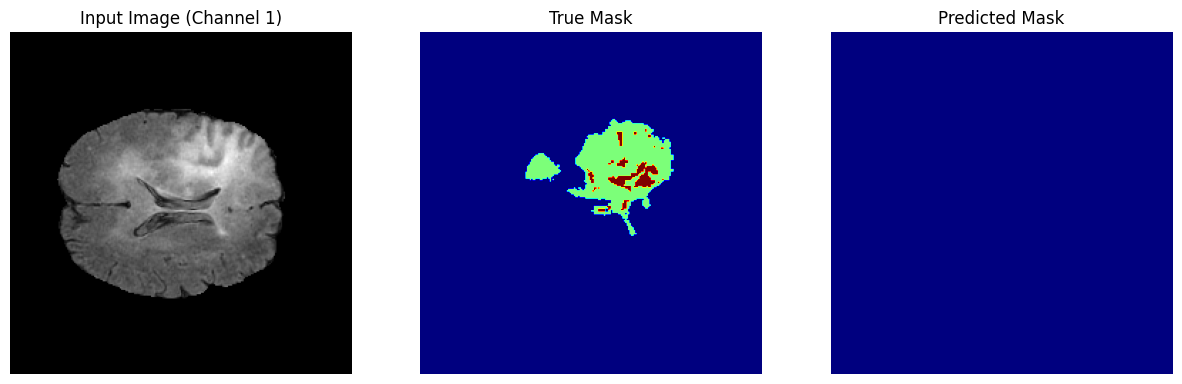

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


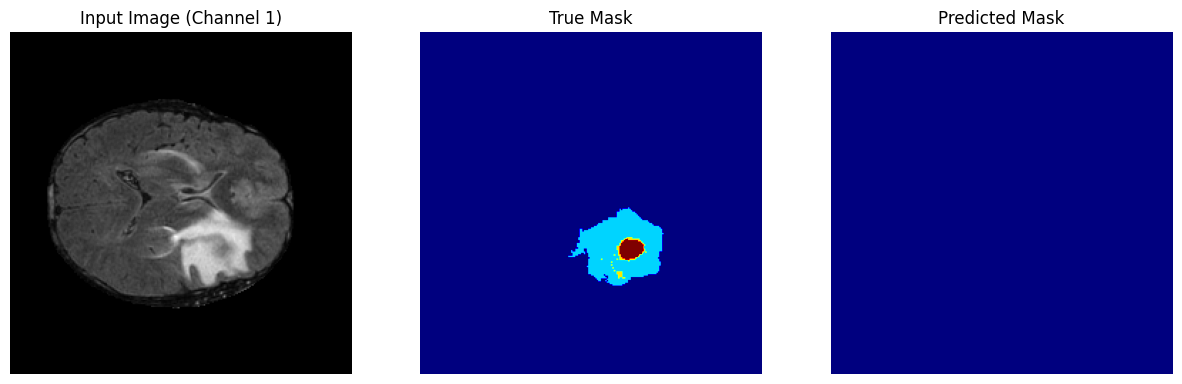

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


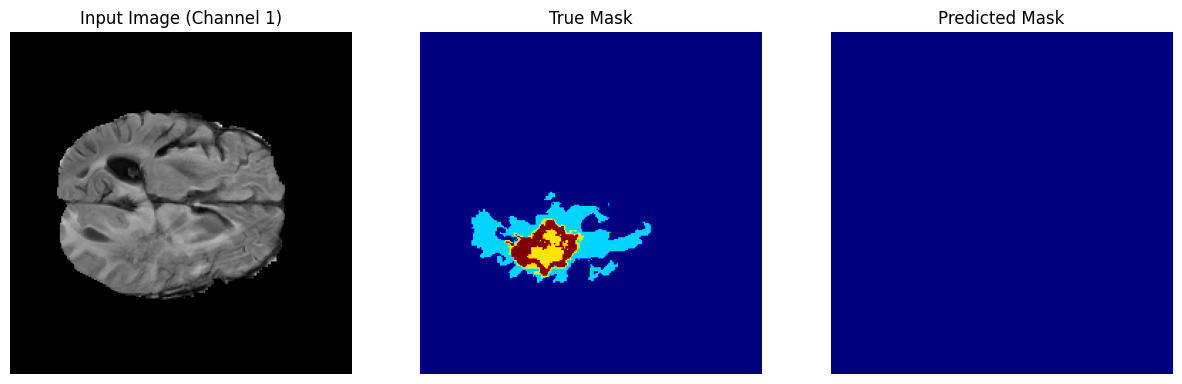

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


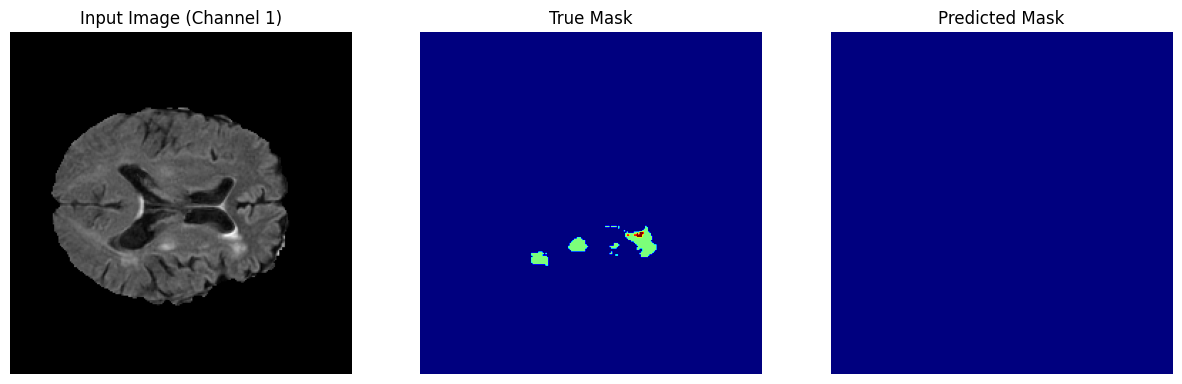

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


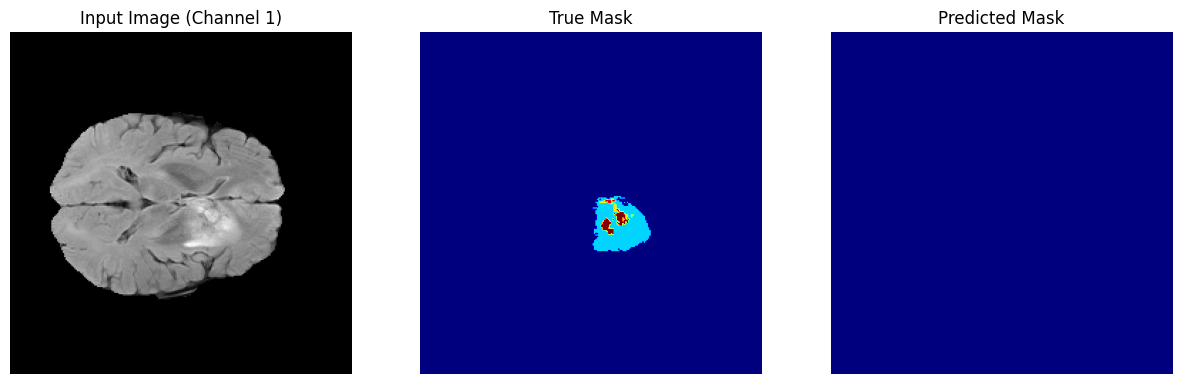

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


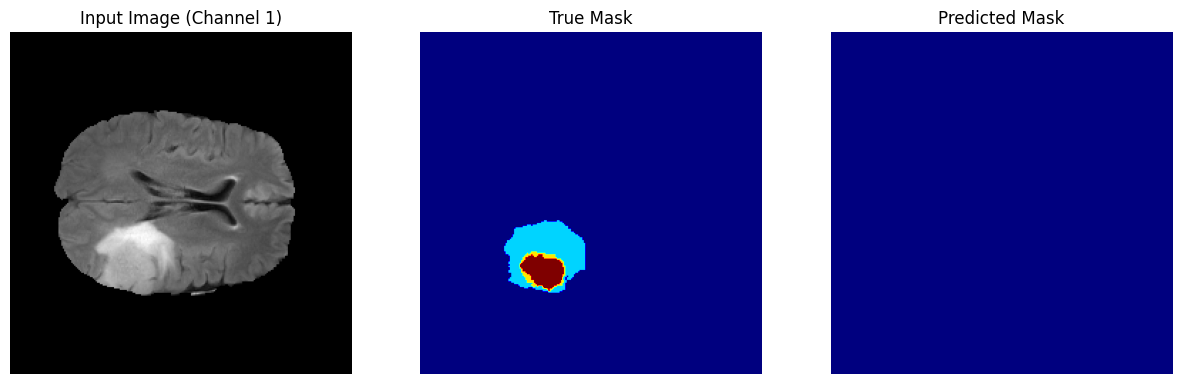

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


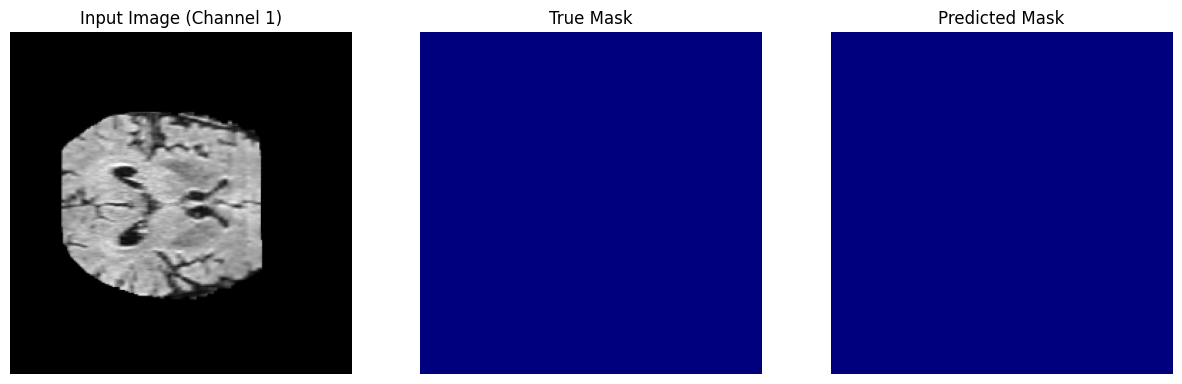

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


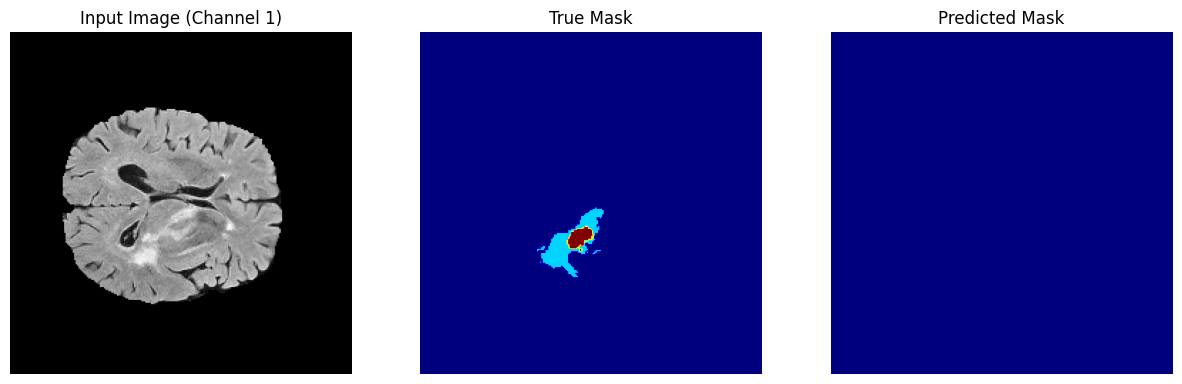

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


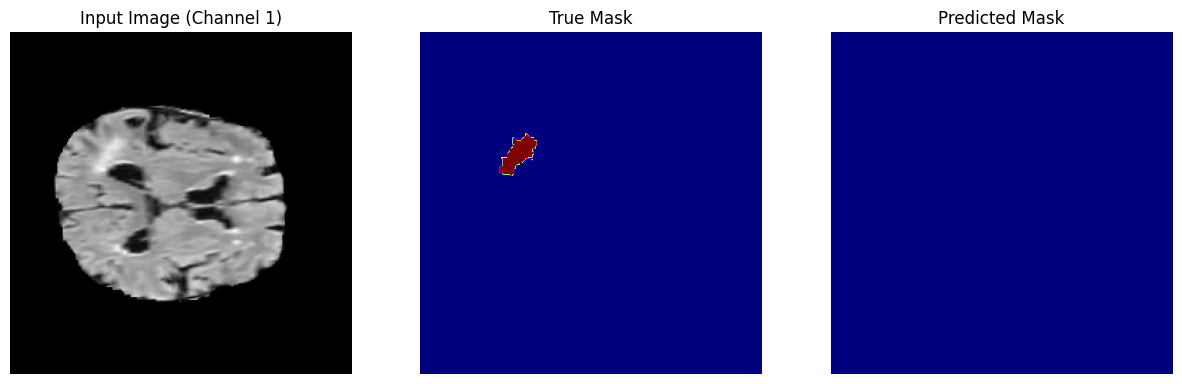

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


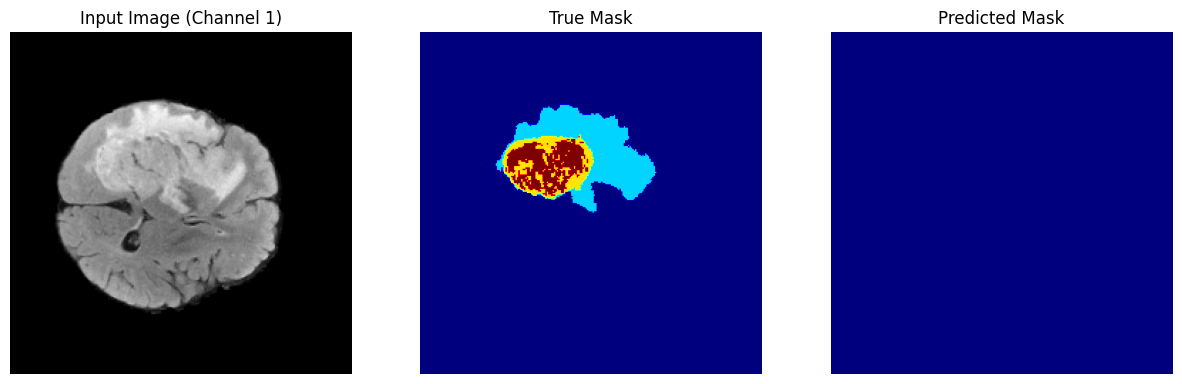

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


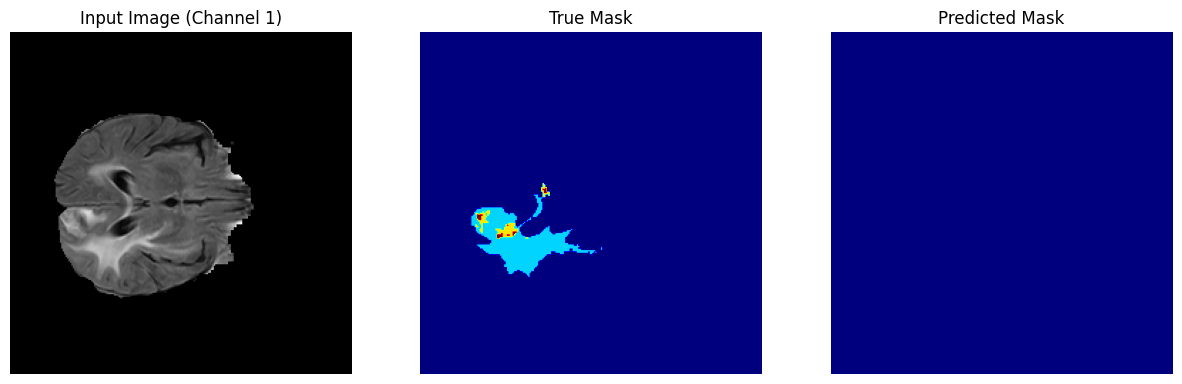

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


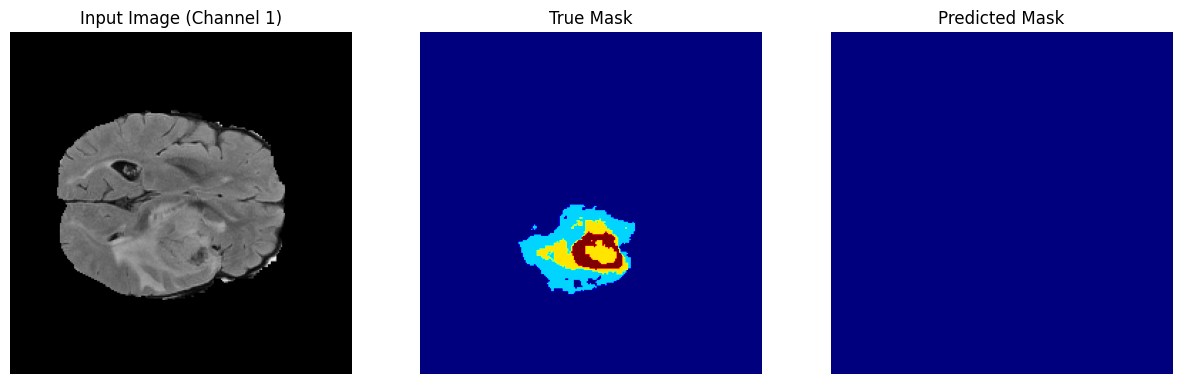

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


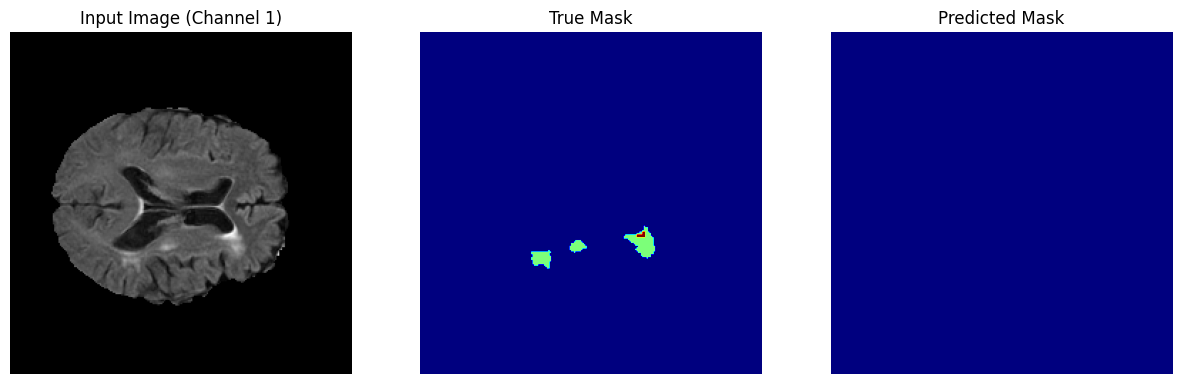

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


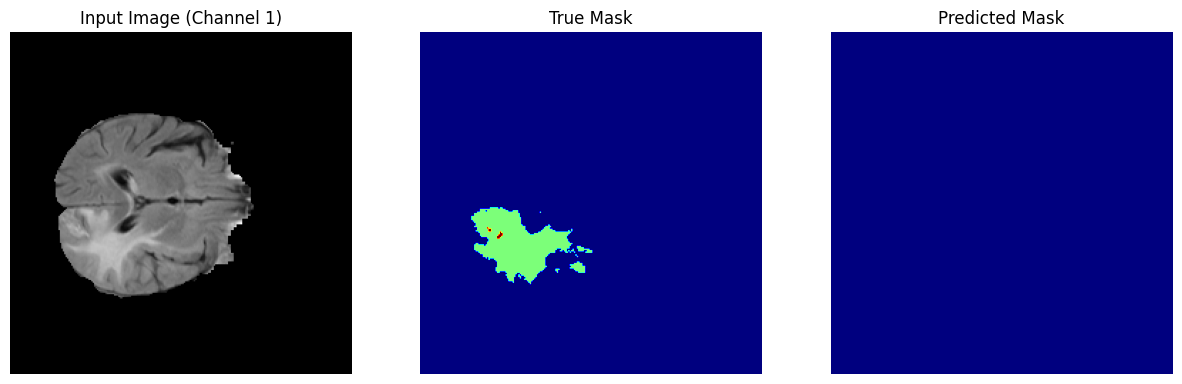

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


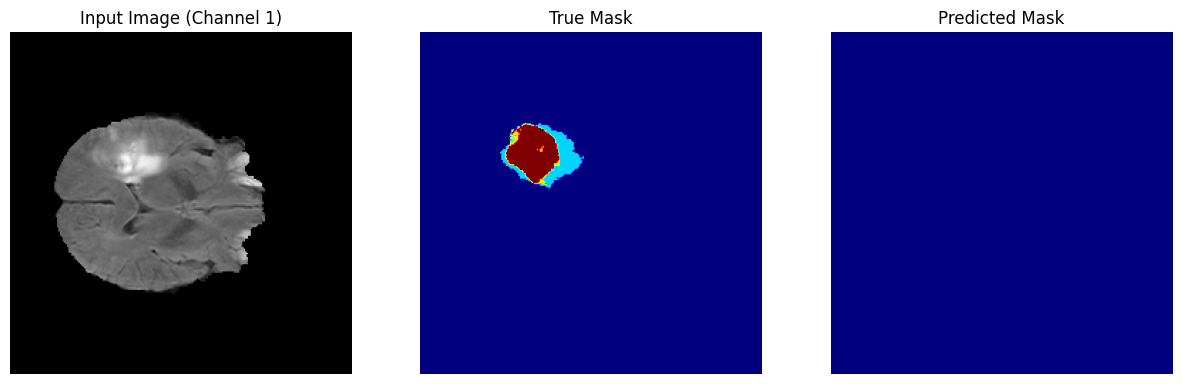

In [3]:
def predict_and_visualize(image_filenames, mask_filenames, model, num_images=5):
    for i in range(num_images):
        # Load and preprocess the image
        img, true_mask = load_and_preprocess_image(image_filenames[i], mask_filenames[i])

        # Expand dimensions to match the model input shape (add batch dimension)
        img_expanded = np.expand_dims(img, axis=0)  # Shape: (1, 240, 240, 4)

        # Make predictions
        pred_mask = model.predict(img_expanded)

        # Get the predicted mask 
        pred_mask = np.argmax(pred_mask, axis=-1)  # Shape: (1, 240, 240)
        pred_mask = np.squeeze(pred_mask)  # Remove the batch dimension (shape: (240, 240))

        # Plotting the results
        plt.figure(figsize=(15, 5))

        plt.subplot(1, 3, 1)
        plt.title('Input Image (Channel 1)')
        plt.imshow(img[:, :, 0], cmap='gray')  # Display first channel of the image
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.title('True Mask')
        plt.imshow(np.argmax(true_mask, axis=-1), cmap='jet')  # Display true mask
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.title('Predicted Mask')
        plt.imshow(pred_mask, cmap='jet')  # Display predicted mask
        plt.axis('off')

        plt.show()

# Test on a few images
num_tests = min(20, len(test_image_filenames))  # Ensure not to exceed available images
predict_and_visualize(test_image_filenames, test_mask_filenames, model, num_images=num_tests)